Authors: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Import data**

In [5]:
subject = 'Niia2001'
resultsFiles = os.listdir(os.path.join(os.getcwd(), 'data', subject))

In [6]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', subject, resultsFiles[1]))
df.head()

,Unnamed: 0,Condition,Modallity,StairCond,Estimation,EstimationRT,Confidence,ConfidenceRT,Alpha,listenBPM,...,RatingProvided,nTrials,EstimatedThreshold,EstimatedSlope,StartListening,StartDecision,ResponseMade,RatingStart,RatingEnds,endTrigger
0,0,psi,Extero,psi,Less,2.049858,94.0,0.836968,0.5,43.0,...,True,0,18.742344,10.050538,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09
1,1,psi,Extero,psi,More,2.262091,93.0,1.612581,18.5,80.5,...,True,1,8.632937,10.331514,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09
2,2,psi,Extero,psi,More,2.162814,74.0,1.118344,8.5,45.0,...,True,2,1.204454,10.562480,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09
3,3,psi,Intero,psi,More,2.195385,88.0,0.741233,0.5,70.5,...,True,3,-18.302129,10.049475,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09
4,4,psi,Extero,psi,Less,2.545402,81.0,0.854789,-1.5,58.5,...,True,4,5.825282,9.363158,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09,1.594999e+09


In [11]:
df['responseCorrect'] = (df.Alpha < 0) & (df.Estimation == 'Less') | (df.Alpha > 0) & (df.Estimation == 'More')

# Response time

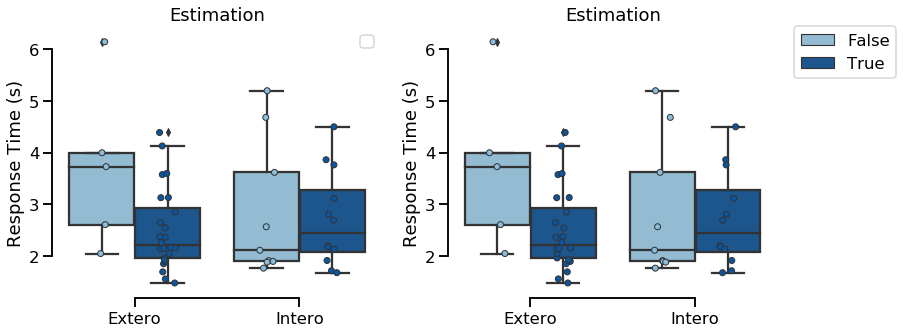

In [56]:
sns.set_context('talk')
palette = ['#88bedc', '#0b559f', '#e98e95', '#d93a46']

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
for i, task, title in zip([0, 1], ['EstimationRT', 'ConfidenceRT'], ['Estimation', 'Confidence']):
    sns.boxplot(data=df, x='Modallity', y='EstimationRT', hue='responseCorrect', palette=palette, ax=axs[i])
    sns.stripplot(data=df, x='Modallity', y='EstimationRT', hue='responseCorrect', dodge=True, linewidth=1, size=6, palette=palette, ax=axs[i])
    axs[i].set_title('Estimation')
    axs[i].set_ylabel('Response Time (s)')
    axs[i].set_xlabel('')
    axs[i].legend('')
sns.despine(trim=10)

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Confidence

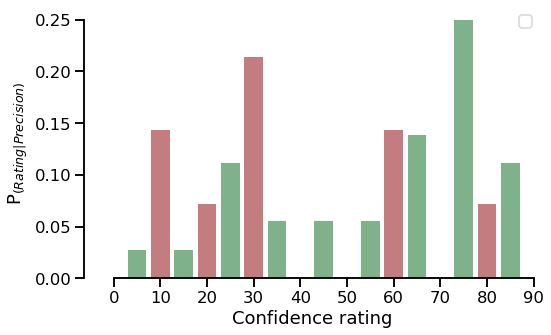

In [55]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5))

for col, corr, label in zip(['#b55d60', '#5f9e6e'], [False, True], ['Incorrect', 'Correct']):

    for conf in range(10, 100, 10):

        # Correct trials
        p = len(df['Confidence'][(df['Confidence']<conf) & (df['Confidence']>conf -10) & (df['responseCorrect'] == corr)])
        
        # Normalize wih total numer of trials
        p /= len(df['Confidence'][(df['responseCorrect'] == corr)])
        
        jit = 5 if corr == True else 0
        plt.bar(x=[conf-10+jit], height=p, width=4, color=col, alpha=.8, label=label)

plt.legend('')
plt.ylabel('P$_{(Rating|Precision)}$')
plt.xlabel('Confidence rating')
plt.xticks(range(0, 100, 10))
sns.despine(trim=10)
plt.tight_layout()

# Psychophysics

Main result file

Posterio distributions

In [20]:
interoPost = np.load(os.path.join(os.getcwd(), 'data', subject, resultsFiles[2]))
exteroPost = np.load(os.path.join(os.getcwd(), 'data', subject, resultsFiles[3]))
interoPost.shape(), exteroPost.shape()

TypeError: 'tuple' object is not callable

In [21]:
interoPost

array([], dtype=float64)

Text(0.5, 1.0, 'Staircases (Psi method)')

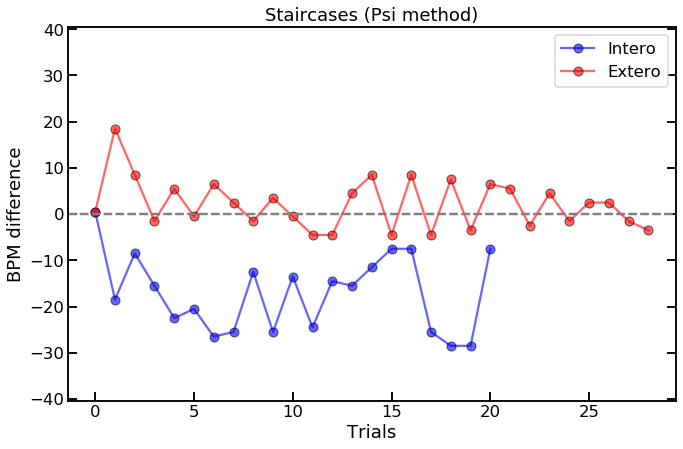

In [42]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.02
rect_scatter = [left, bottom, width, height]
rect_gen = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(13, 8))

# staircase traces
ax_scatter = plt.axes(rect_scatter)
for cond, col in zip(['Intero', 'Extero'], ['b', 'r']):
    this_df = df[df.Modallity == cond]
    ax_scatter.plot(np.arange(0, len(this_df.Alpha)), 
                    this_df.Alpha, col, marker='o', alpha=0.6, markeredgecolor='k', label=cond)

    ax_scatter.axhline(y=0, linestyle='--', color = 'gray')
ax_scatter.legend()
ax_scatter.set_ylabel('BPM difference')
ax_scatter.set_xlabel('Trials')
ax_scatter.set_ylim(-40.5, 40.5)
ax_scatter.tick_params(direction='in', right=True)
ax_scatter.set_title('Staircases (Psi method)')

NameError: name 'psi_df1' is not defined

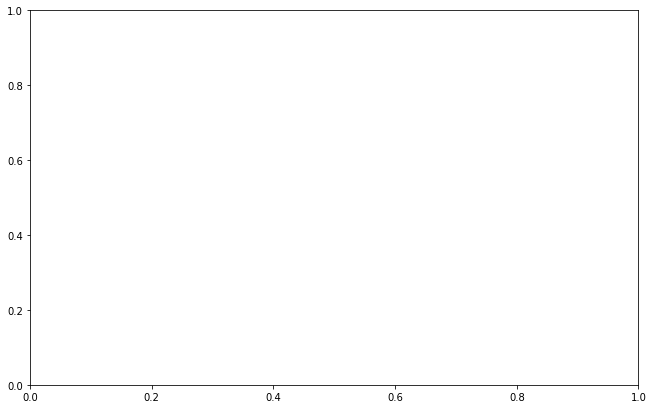

In [83]:
# Generative functions
ax_gen = plt.axes(rect_gen)
slopeI = psi_df1.Slope.iloc[-1]
thresholdI = psi_df1.Threshold.iloc[-1]
ax_gen.plot((norm.cdf(np.linspace(-30, 30, 500), loc=thresholdI, scale=slopeI)),
            np.linspace(-30, 30, 500), '--', color='b')

slopeE = psi_df2.Slope.iloc[-1]
thresholdE = psi_df2.Threshold.iloc[-1]
ax_gen.plot((norm.cdf(np.linspace(-30, 30, 500), loc=thresholdE, scale=slopeE)),
            np.linspace(-30, 30, 500), '--', color='g')
ax_gen.set_ylim(ax_scatter.get_ylim())
ax_gen.set_title('Generative function')

sns.despine()

plt.savefig('staircases.png', dpi=600)

## Posteriors

In [12]:
Interoposterior = np.load('data/Camile/HRD_fMRI-2020_Jul_10_1503_InteroPosteriorHistory.npy')
Exteroposterior = np.load('data/Camile/HRD_fMRI-2020_Jul_10_1503_ExteroPosteriorHistory.npy')

In [26]:
Exteroposterior[1].

(82, 200)

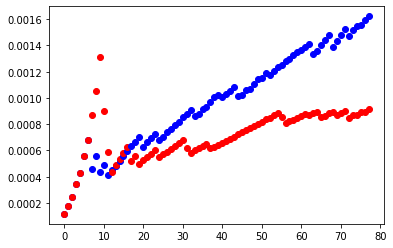

In [27]:
for i in range(78):
    plt.plot(i, Exteroposterior[i].mean(1).max(), 'bo')
    plt.plot(i, Interoposterior[i].mean(1).max(), 'ro')

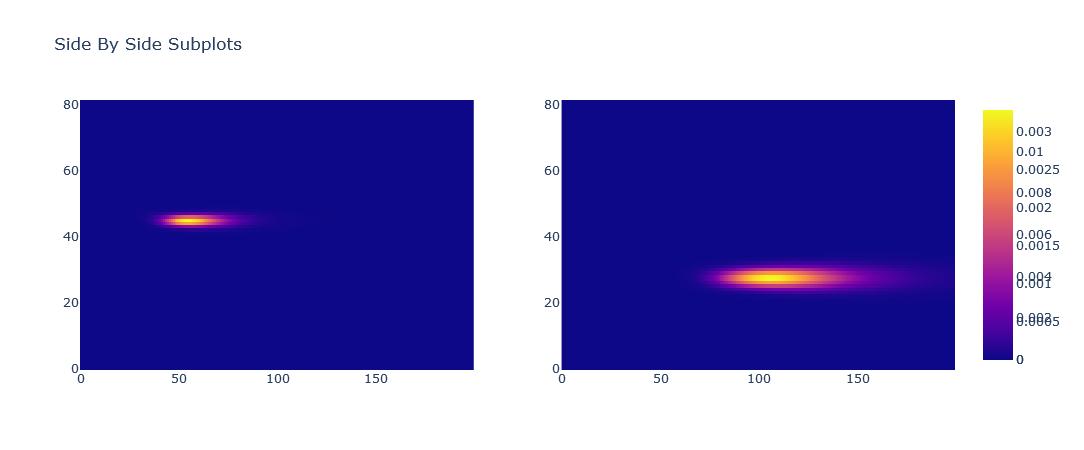

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

for step in np.arange(0, 80):

    fig.add_trace(go.Heatmap(z=Exteroposterior[-1, :, :]),
                  row=1, col=1)

    fig.add_trace(go.Heatmap(z=Interoposterior[-1, :, :]), 
                  row=1, col=2)

fig.update_layout(title_text="Side By Side Subplots")
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [26]:
import pickle
objects = []
with (open("data/test/HRD_fMRI-2020_Jul_10_0035_pickle_1.psydat", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [44]:
ar = objects[0]._psi._probLambda[0, :, :, 0]

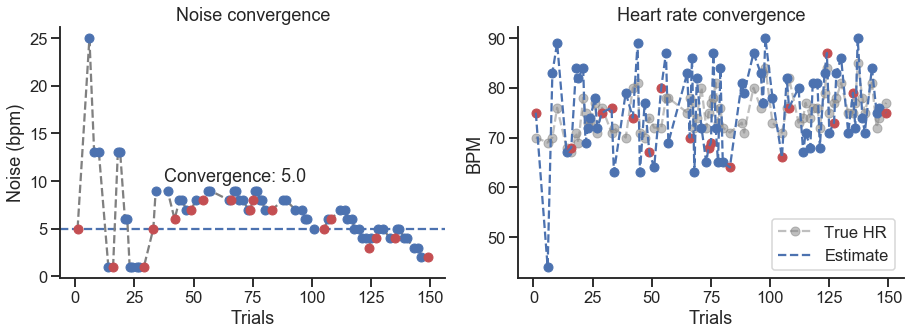

In [4]:
hrd_convergence(results_df[results_df.StairCond==1])
plt.savefig('clara_stari1.png', dpi=600)

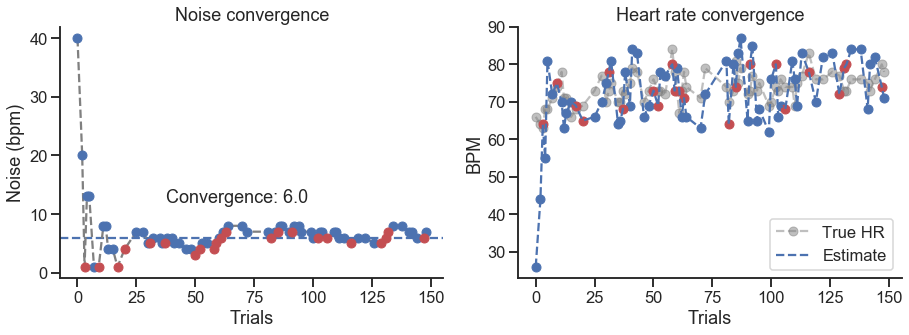

In [5]:
hrd_convergence(results_df[results_df.StairCond==0])
plt.savefig('clara_stari2.png', dpi=600)

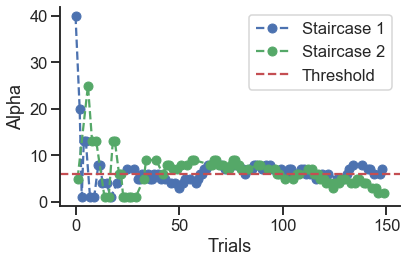

In [6]:
# staircase traces

tr1, = plt.plot(np.abs(results_df.Alpha[results_df.StairCond==0]), 'bo--')
tr2, = plt.plot(np.abs(results_df.Alpha[results_df.StairCond==1]), 'go--')
tr1.set_label('Staircase 1')
tr2.set_label('Staircase 2')

sns.despine()

# Convergence line
revers = np.abs(results_df.Alpha[results_df.Accuracy == 0])
conv = np.median(revers[~madmedianrule(revers)])
plt.axhline(y=conv, linestyle='--', color = 'r', label = 'Threshold')
#thresh.set_label('Threshold')
plt.legend()
# Text

#plt.text(len(results_df)/2, conv*2, 'Threshold: ' + str(conv))
plt.ylabel('Alpha')
plt.xlabel('Trials')

plt.tight_layout()
plt.savefig('staircases.png', dpi=600)

## Bayesian hierarchical model (requires PyMC3)

In [1]:
import pymc3 as pm

# Barplots

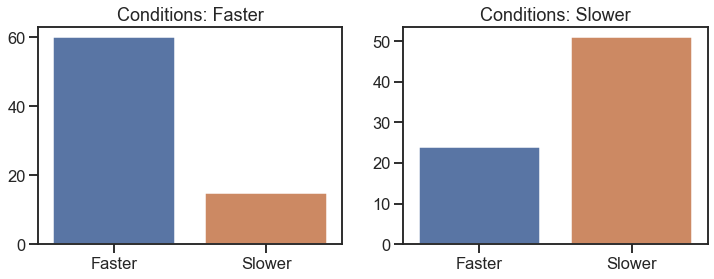

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
up = len(results_df[(results_df.Estimation == 'up') & (results_df.Condition == 'More')])
down = len(results_df[(results_df.Estimation == 'down') & (results_df.Condition == 'More')])
sns.barplot(x=['Faster', 'Slower'], y=[up, down])
plt.title('Conditions: Faster')

plt.subplot(122)
up = len(results_df[(results_df.Estimation == 'up') & (results_df.Condition == 'Less')])
down = len(results_df[(results_df.Estimation == 'down') & (results_df.Condition == 'Less')])
sns.barplot(x=['Faster', 'Slower'], y=[up, down])
plt.title('Conditions: Slower')
plt.savefig('HRD_barplot.png', dpi=600)

# Accuracy

In [8]:
len(results_df)

150

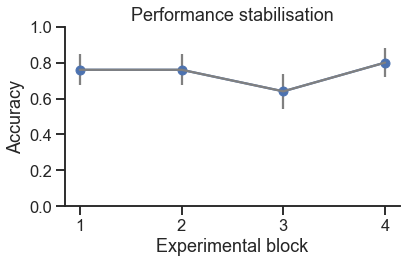

In [9]:
from scipy.stats import sem
mean, err = [], []
for x, i in enumerate(range(0, 100, 25)):
    mean.append(np.nanmean(results_df.Accuracy.iloc[i:i+25]))
    err.append(sem(results_df.Accuracy.iloc[i:i+25]))

plt.plot([1, 2, 3, 4], mean, 'o-')
plt.errorbar(x=[1, 2, 3, 4], y=mean,
             yerr=err, color='gray')
plt.ylim(0, 1)
sns.despine()
plt.xlabel('Experimental block')
plt.ylabel('Accuracy')
plt.title('Performance stabilisation')
plt.tight_layout()
plt.savefig('HRD_Accuracy.png', dpi=600)

# Metacognition

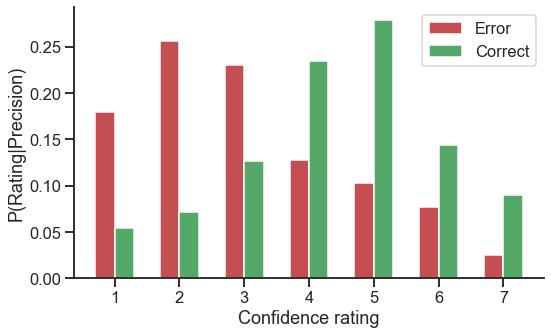

In [10]:
plot_confidence(results_df.Confidence, results_df.Accuracy)
plt.savefig('confidence2.png', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Confidence
for conf in range(1, 8):
    # Correct trials
    p = sum((accuracy == 0) & (confidence == conf)) / sum(accuracy == 0)
    if conf == 1:
        plt.bar(conf-0.15, p, width=0.30, color='r', label='Error')
    else:
        plt.bar(conf-0.15, p, width=0.30, color='r')
    # Incorrect trials
    p = sum((accuracy == 1) & (confidence == conf)) / sum(accuracy == 1)

    if conf == 1:
        plt.bar(conf+0.15, p, width=0.30, color='g', label='Correct')
    else:
        plt.bar(conf+0.15, p, width=0.30, color='g')


plt.legend()
plt.ylabel('P(Rating|Precision)')
plt.xlabel('Confidence rating')
plt.xticks(range(1, 8))
sns.despine()
plt.tight_layout()
if path is not None:
    plt.savefig(path + 'confidence.png', dpi=600)

return fig, ax

Text(0, 0.5, 'P(Rating|Accuracy)')

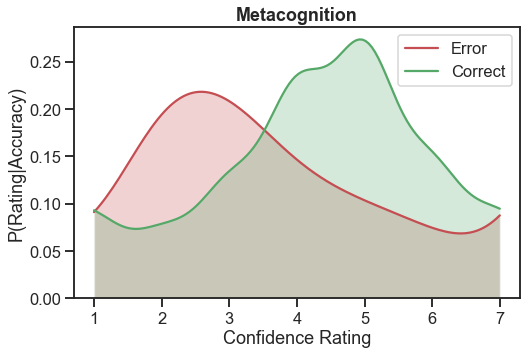

In [45]:
errConf = results_df.Confidence[results_df.Accuracy == 0]
corrConf = results_df.Confidence[results_df.Accuracy == 1]


plt.figure(figsize = (8,5))
sns.kdeplot(errConf, shade = True, label = 'Error', color = 'r', cut = 0)
sns.kdeplot(corrConf, shade = True, label = 'Correct', color = 'g', cut = 0)
plt.title('Metacognition', fontweight = 'bold')
plt.xlabel('Confidence Rating')
plt.ylabel('P(Rating|Accuracy)')



# Psychometric function using the BayesFit toolbox

References: http://www.slugocm.ca/bayesfit/

Text(0, 0.5, 'Proportion correct')

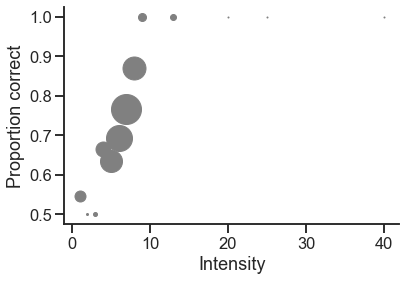

In [46]:
df = results_df.copy()
df.Alpha = np.abs(df.Alpha)
data = np.zeros((len(df.Alpha.unique()), 3))
for ii, intensity in enumerate(np.sort(df.Alpha.unique())):
    p = df[df.Alpha == intensity].Accuracy.mean()
    s= len(df[df.Alpha == intensity])
    plt.plot(intensity, p, marker='o', color='gray', markersize=s)
    
    # Store results
    data[ii, 0] = int(intensity)
    data[ii, 1] = int(len(df[(df.Alpha == intensity) & (df.Accuracy == 1)]))
    data[ii, 2] = int(len(df[(df.Alpha == intensity)]))

sns.despine()
plt.xlabel('Intensity')
plt.ylabel('Proportion correct')